# <center> **E-COMMERCE CUSTOMER CHURN**</center>

### Capstone Project 3: 

In this project, I analyzed an e-commerce dataset to predict customer churn using machine learning. The focus was on creating model that influence churn and providing insights to improve customer retention. I worked on data preprocessing, model development, and evaluation to create a predictive system, taking on the role of a data analyst within the organization.
<div style="text-align: right;">
    by: Kerin A (2025)
</div>

***

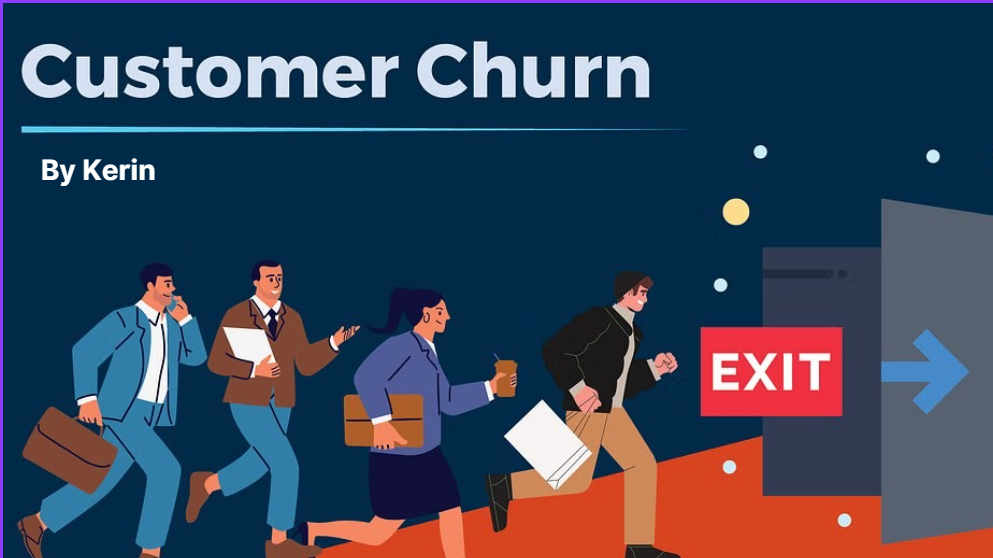

# Contents

1. **Background**
2. **Problem Statement**
3. **Data**  
   - **3.1. Setup Data**  
   - **3.2. Data Exploration**  
   - **3.3. Data Cleaning**  
   - **3.4. Data Preparation & Feature Engineering**  
4. **Modelling for Machine Learning**  
   - **4.1. Finding the Best Model & Resampling Method**  
   - **4.2. Hyperparameter Tuning**  
   - **4.3. Feature Importance**  
5. **Final Summarization**  
   - **5.1. Cost-Benefit Analogy**  
   - **5.2. Recommendation**  
   - **5.3. Conclusion**  

***
## **1. Background**

Customer churn is a significant challenge in the e-commerce industry, directly affecting revenue and long-term business growth. Understanding the factors that drive churn enables businesses to take proactive steps to retain customers and optimize their strategies.

***
## **2. Problem Statement**

The objective of this project is to develop a machine learning model to predict customer churn. By identifying high-risk customers, businesses can implement targeted retention strategies to minimize losses and improve customer loyalty.

### Metric Evaluation

- **(TP) True Positive**: Costumer predicted to churn and actually churn
- **(FP) False Positive**: Costumer predicted to churn, but actually not to churn
- **(FN) False Negative**: Costumer is predicted not to churn, but actually churn
- **(TN) True Negative**: costumer is predicted not to churn and actually not to churn

<br>

**GOALS**
- Identifying key factors that contribute to churn.
- Providing strategic recommendations to improve customer retention and reduce churn.
- Predicting customer churn likelihood by analyzing customer behavior, engagement, and financial patterns, enabling businesses to take proactive retention actions.


***
## **3. Data**


This dataset contains customer transaction and behavioral data from an e-commerce platform. Each row represents a unique customer, capturing various attributes related to their engagement, purchasing habits, and likelihood of churn (whether they stop using the service). The dataset includes the following columns:

| Column | Description |
| --- | --- |
| Tenure | The length of time the user has been subscribed to the service. |
| WarehouseToHome | The distance from the warehouse to the user's residence. |
| NumberOfDeviceRegistered | The total number of devices registered under a single user account.|
| PreferedOrderCat | The product category most frequently ordered by the user in the last 30 days.|
| SatisfactionScore | A score representing customer satisfaction with the service. |
| MaritalStatus | The marital status of the customer.|
| NumberOfAddress | The total number of addresses recorded under a single user account. |
| Complaint | The number of complaints submitted by the user in the last 30 days. |
| DaySinceLastOrder | The number of days since the customer’s last order. |
| CashbackAmount | The average amount of cashback received by the user in the last 30 days. |
| Churn | An indicator of whether the user has stopped using the service (1 for churn, 0 for not churn). |

### 3.1. Setup Data

**Import Libraries**

In [118]:
import pandas as pd
import numpy as np

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# ⚙️ Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

# 🤖 Machine Learning Algorithms
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# 🎯 Metrics
from sklearn.metrics import make_scorer, fbeta_score, classification_report, confusion_matrix

# ⚖️ Imbalance Handling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline

# 🔍 Cross-validation & Hyperparameter Tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score

# 🔎 Explainable ML
import shap

# 🚨 Ignore Warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# 🛠️ Set max columns
pd.set_option('display.max_columns', None)

# 📊 Additional Visualization
import missingno as msno  
import matplotlib.patches as mpatches

# 🎯 Feature Selection
from sklearn.feature_selection import VarianceThreshold, SelectFromModel

**Load Dataset**

In [3]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
display(df, df.shape)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


(3941, 11)

### 3.2. Data Exploration

**Data Check**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


The dtype includes: float64, int64, and object

With **11 columns** and **3940 rows**

**Data Description**

In [9]:
display (df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


### 3.3. Data Cleaning

**Duplicated Values**

In [12]:
df.duplicated().sum() / len(df) * 100

17.026135498604415

In [13]:
# Deleting duplicated data
df = df.drop_duplicates()

# Dataframe shape after deleting
df.shape

(3270, 11)

> 17% of data are duplicated

**Missing Values**

In [16]:
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

Tenure                      4.892966
WarehouseToHome             4.128440
NumberOfDeviceRegistered    0.000000
PreferedOrderCat            0.000000
SatisfactionScore           0.000000
MaritalStatus               0.000000
NumberOfAddress             0.000000
Complain                    0.000000
DaySinceLastOrder           5.535168
CashbackAmount              0.000000
Churn                       0.000000
dtype: float64


> Missing Values :
> - Tenure (4.89 %)
> - WarehouseToHome (4.12 %)
> - DaySinceLastOrder (5.53 %)

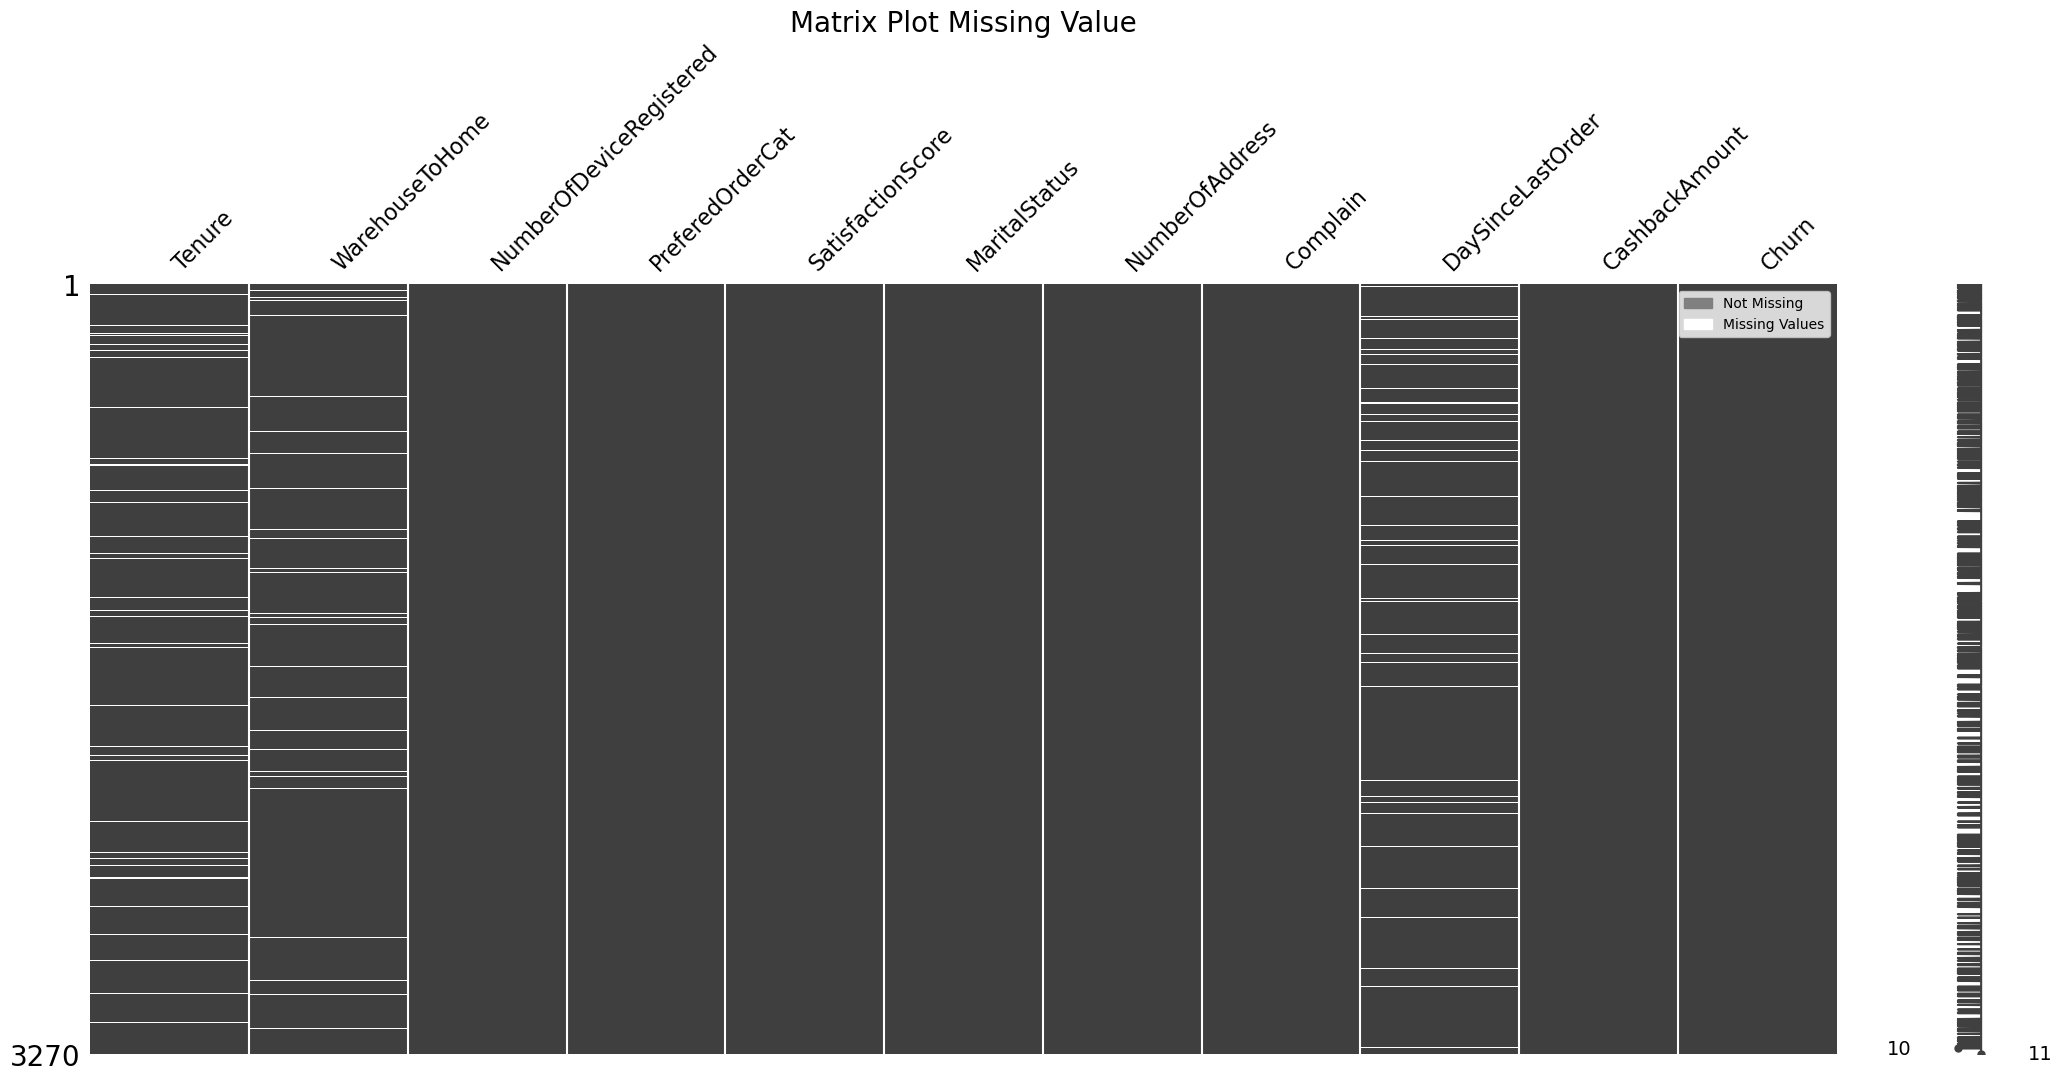

In [18]:
msno.matrix(df)
gray_patch = mpatches.Patch(color='gray', label='Not Missing')
white_patch = mpatches.Patch(color='white', label='Missing Values')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value', fontsize=20)
plt.show()

> The missing values in each column appear to follow a random pattern.

> Handling missing values is essential to maintain data quality, improve model performance, and prevent biases in analysis. Which I will do in the preprocessing step.

**Checking Variable Type (Categorical & Numerical)**

##### *Categorical Variables*

In [22]:
# Identifying categorical variables
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]

print(f'There are {len(cat_features)} categorical features:\n{cat_features}')

There are 2 categorical features:
['PreferedOrderCat', 'MaritalStatus']


##### *Numerical Variables*

In [24]:
# Identifying numerical variables
num_features = [feature for feature in df.columns if df[feature].dtype != 'O' and feature !='Churn']

print(f'There are {len(num_features)} numerical features:\n{num_features}')

There are 8 numerical features:
['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']


**Check for Unique Value**

In [26]:
print(f'There are {df.nunique()} unique rows')

There are Tenure                        36
WarehouseToHome               33
NumberOfDeviceRegistered       6
PreferedOrderCat               6
SatisfactionScore              5
MaritalStatus                  3
NumberOfAddress               14
Complain                       2
DaySinceLastOrder             22
CashbackAmount              2335
Churn                          2
dtype: int64 unique rows


##### *Unique in Categorical Variables*

In [35]:
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
cat_features

['PreferedOrderCat', 'MaritalStatus']

In [40]:
for i in cat_features:
    print(f'Total unique values in {i}: ', df[i].nunique())
    print(f'Unique values: ', df[i].unique())
    print()

Total unique values in PreferedOrderCat:  6
Unique values:  ['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']

Total unique values in MaritalStatus:  3
Unique values:  ['Single' 'Married' 'Divorced']



In [43]:
# Handling Unique Value from 'Mobile' into 'Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

In [45]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone          1183
Fashion                484
Grocery                241
Others                 149
Name: count, dtype: int64

##### *Unique in Numerical Variables*

In [48]:
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Churn']))]
num_features

['Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount']

**Check for Outliers**

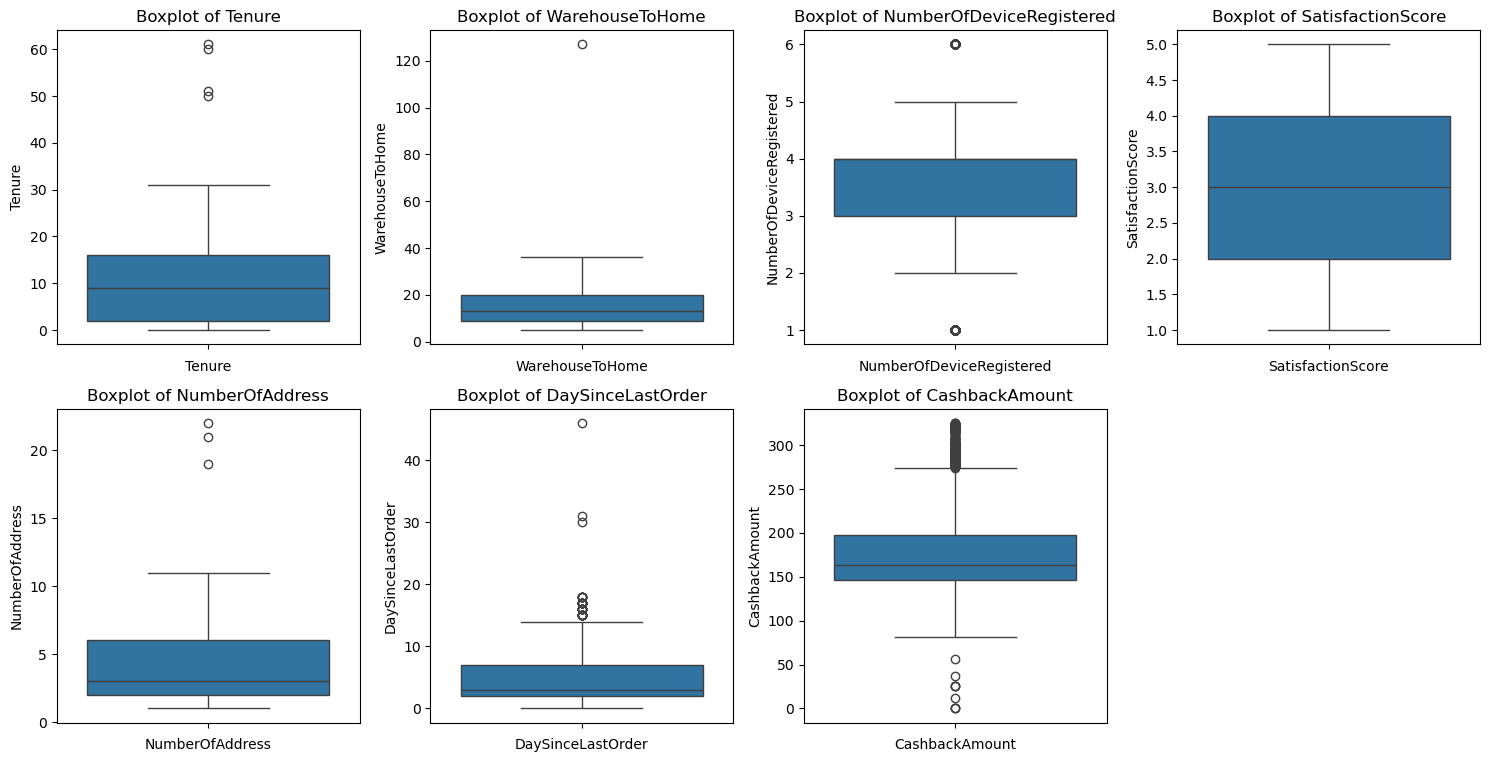

In [51]:
col_names = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder',
       'CashbackAmount']

plt.figure(figsize=(15, 15))
for i, column in enumerate(col_names, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

> Based on the boxplot, we can observe the presence of outliers in the data. However, since these values are still considered valid and not errors, they are not removed. Instead, they are retained as they can contribute to the model's ability to learn from a diverse range of data points.

**Check Correlations**

In [626]:
df.corr()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
Tenure,1.000000,-0.028010,-0.041742,-0.185031,-0.029982,-0.082556,0.227957,-0.020666,0.170329,0.464551,-0.348654
WarehouseToHome,-0.028010,1.000000,0.015884,-0.085561,0.007628,-0.019802,-0.010757,0.046227,0.018332,-0.006126,0.074237
NumberOfDeviceRegistered,-0.041742,0.015884,1.000000,-0.018912,-0.010991,0.037295,0.076437,0.005338,0.010831,0.120136,0.109612
PreferedOrderCat,-0.185031,-0.085561,-0.018912,1.000000,0.003667,0.033487,-0.089050,-0.005337,-0.227429,-0.346823,0.103028
SatisfactionScore,-0.029982,0.007628,-0.010991,0.003667,1.000000,-0.080523,0.042449,-0.035167,0.039855,0.006499,0.098393
MaritalStatus,-0.082556,-0.019802,0.037295,0.033487,-0.080523,1.000000,-0.009096,-0.004650,-0.038014,-0.074925,0.122829
NumberOfAddress,0.227957,-0.010757,0.076437,-0.089050,0.042449,-0.009096,1.000000,-0.011490,-0.062229,0.186623,0.046354
Complain,-0.020666,0.046227,0.005338,-0.005337,-0.035167,-0.004650,-0.011490,1.000000,-0.052269,-0.002040,0.262278
DaySinceLastOrder,0.170329,0.018332,0.010831,-0.227429,0.039855,-0.038014,-0.062229,-0.052269,1.000000,0.340341,-0.147918
CashbackAmount,0.464551,-0.006126,0.120136,-0.346823,0.006499,-0.074925,0.186623,-0.002040,0.340341,1.000000,-0.151475


> There is no strong correlation between features and label (< 0.5 Corr)

**Explore Class Distribution**

In [53]:
df_proportion=df['Churn'].value_counts(normalize=True).reset_index()
df_proportion

,Churn,proportion
0,0,0.836697
1,1,0.163303


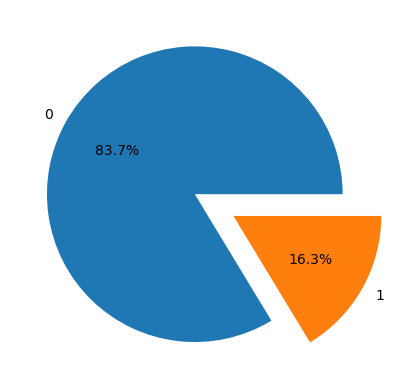

In [55]:
plt.pie(data=df_proportion,x='proportion',labels='Churn',explode=(0,0.3),autopct='%0.1f%%')
plt.show()

> There is 16.3% data that are churn.

### 3.4. Data Preparation & Feature Engineering

**Define features & target**

In [60]:
X = df.drop(['Churn'],axis=1) # features
y = df['Churn'] # target

**Traing Test Split Data**

In [63]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2, #train 80% & test 20%
    random_state=42
) 

In [65]:
# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        # Impute Missing Values and Scale Numerical Features
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']),
        
        # Scale Other Numerical Features
        ('num_other', RobustScaler(), ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount']),
        
        # One-Hot Encode Categorical Features
        ('cat1', OneHotEncoder(handle_unknown='ignore'), ['PreferedOrderCat', 'MaritalStatus'])
    ],
    remainder='passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'DaySinceLastOrder']),
                                ('num_other', RobustScaler(),
                                 ['NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'CashbackAmount']),
                                ('cat1', OneHotEncoder(handle_unknown='ignore'),
                                 ['PreferedOrderCat', 'MaritalStatus'])])

In [67]:
# fit & transform
X_train_preprocessed = preprocessor.fit_transform(X_train, y_train)
X_test_preprocessed = preprocessor.transform(X_test)

> **Impute Missing Values & Scale Numerical Features** for 'Tenure', 'WarehousetoHome', and 'DaySinceLastOrder' (Using Simple Imputer & Robust Scaler)
- Some numerical columns (Tenure, WarehouseToHome, DaySinceLastOrder) have missing values.
- These features are not normally distributed and contain missing values, so we fill the missing values using the median (which is robust to outliers).
- After imputing, we scale the values using RobustScaler to handle outliers.

> **One-Hot Encode Categorical Features** for 'PreferedOrderCat', 'MaritalStatus'
- Convert categorical data into numerical values. PreferedOrderCat and MaritalStatus do not have a natural order (non-ordinal), so One-Hot Encoding is the best approach.

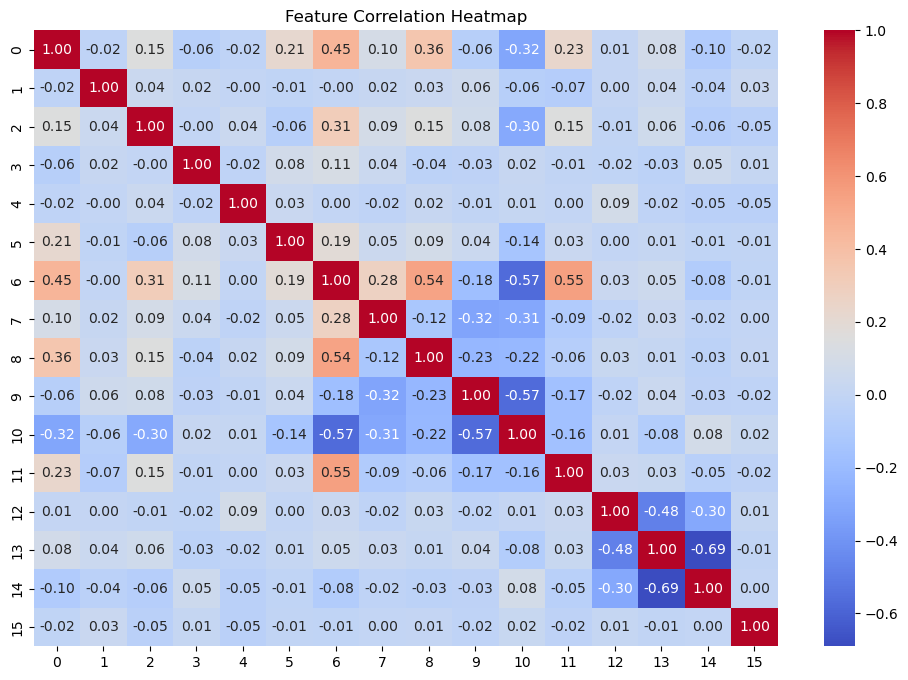

In [70]:
# Correlation Heatmap (Use preprocessed features)
plt.figure(figsize=(12, 8))
corr_matrix = pd.DataFrame(X_train_preprocessed).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

***
## 4. Modelling for Machine Learning

### 4.1. Finding the Best Model & Resampling Method

In [74]:
# Define imbalance handling techniques
imbalance_methods = {
    'None': None,
    'SMOTE': SMOTE(random_state=42),
    'Random Undersampling': RandomUnderSampler(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42)
}

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Define F2-score metric
f2_scorer = make_scorer(fbeta_score, beta=2)

# Iterate through models and imbalance methods
best_model = None
best_method = None
best_score = 0
for model_name, model in models.items():
    for method_name, sampler in imbalance_methods.items():
        print(f'Training {model_name} with {method_name}...')
        
        # Define pipeline with preprocessing and imbalance handling
        steps = [('preprocessor', preprocessor)]
        if sampler:
            steps.append(('sampler', sampler))
        steps.append(('model', model))
        
        pipeline = ImbPipeline(steps)
        
        # Perform cross-validation
        scores = cross_val_score(pipeline, X_train, y_train, scoring=f2_scorer, cv=5, n_jobs=-1)
        mean_score = scores.mean()
        
        # Store best model, method, and score
        if mean_score > best_score:
            best_score = mean_score
            best_method = method_name
            best_model = model_name
        
        print(f'Best F2-score for {model_name} with {method_name}: {mean_score}')

print(f'Best Model: {best_model} with {best_method} and F2-score {best_score}')

Training Decision Tree with None...
Best F2-score for Decision Tree with None: 0.5999995398625796
Training Decision Tree with SMOTE...
Best F2-score for Decision Tree with SMOTE: 0.6435750392570709
Training Decision Tree with Random Undersampling...
Best F2-score for Decision Tree with Random Undersampling: 0.6496576796875267
Training Decision Tree with SMOTETomek...
Best F2-score for Decision Tree with SMOTETomek: 0.6280702476925459
Training KNN with None...
Best F2-score for KNN with None: 0.3589473517943418
Training KNN with SMOTE...
Best F2-score for KNN with SMOTE: 0.6420512119588031
Training KNN with Random Undersampling...
Best F2-score for KNN with Random Undersampling: 0.6113855333845983
Training KNN with SMOTETomek...
Best F2-score for KNN with SMOTETomek: 0.6402987608239978
Training XGBoost with None...
Best F2-score for XGBoost with None: 0.6626889005891032
Training XGBoost with SMOTE...
Best F2-score for XGBoost with SMOTE: nan
Training XGBoost with Random Undersampling...

> **Best Model**: LightGBM with Random Undersampling and **F2-score 0.7613124897207604** (Before Tuning)

### 4.2. Hyperparameter Tuning

In [122]:
# Define resampling method (Random Undersampling)
rus = RandomUnderSampler(random_state=42)

# Define F2-score metric
f2_scorer = make_scorer(fbeta_score, beta=2)

# Model LightGBM (default sebelum tuning)
lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')

# Pipeline dengan preprocessing dan resampling
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('sampler', rus),
    ('model', lgbm_model)
])

# Hyperparameter grid
param_grid = {
    'model__learning_rate': [0.05],
    'model__n_estimators': [300],
    'model__max_depth': [10],
    'model__subsample': [1.0],
    'model__colsample_bytree': [0.7],
    'model__reg_lambda': [0.5, 1, 2, 5],
    'model__min_gain_to_split': [0.05, 0.1, 0.2],
    'model__reg_alpha': [1, 2, 5],  
}

# Grid Search dengan cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring=f2_scorer, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Model terbaik setelah tuning
best_model = grid_search.best_estimator_

# Prediksi pada test set
y_pred = best_model.predict(X_test)

# Evaluasi model setelah tuning
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
[LightGBM] [Info] Number of positive: 427, number of negative: 427
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 854, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [123]:
grid_search = GridSearchCV(pipeline, param_grid, scoring=f2_scorer, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
[LightGBM] [Info] Number of positive: 427, number of negative: 427
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 854, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus',
                                                                          'Complain'])])),
                                       ('sa...
                                                       random_state=42))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.7],
                         'model__learning_rate': [0.05],
                         'model__max_depth': [10],
                         'model__min_gain_to_split': [0.05, 0.1, 0.2],
                         'model__n_estimators': [300],
                         'model__reg_alpha': [1, 2, 5],
                         'model__reg_lambda': [0.5, 1, 2, 5],
                         'model__subsample': [1.0]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
             verbose=2)

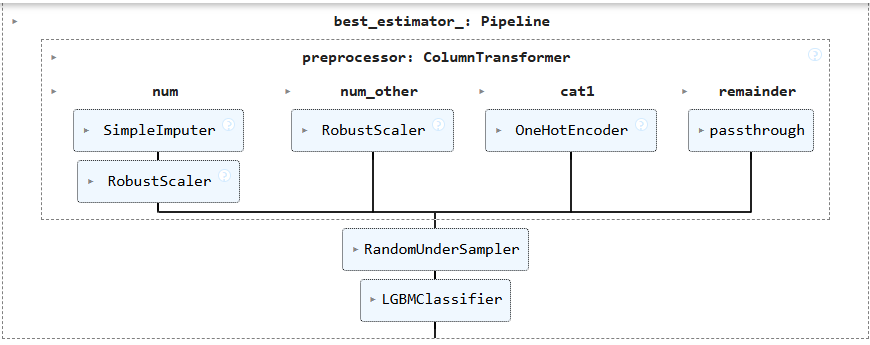

### 4.3. Feature Importance

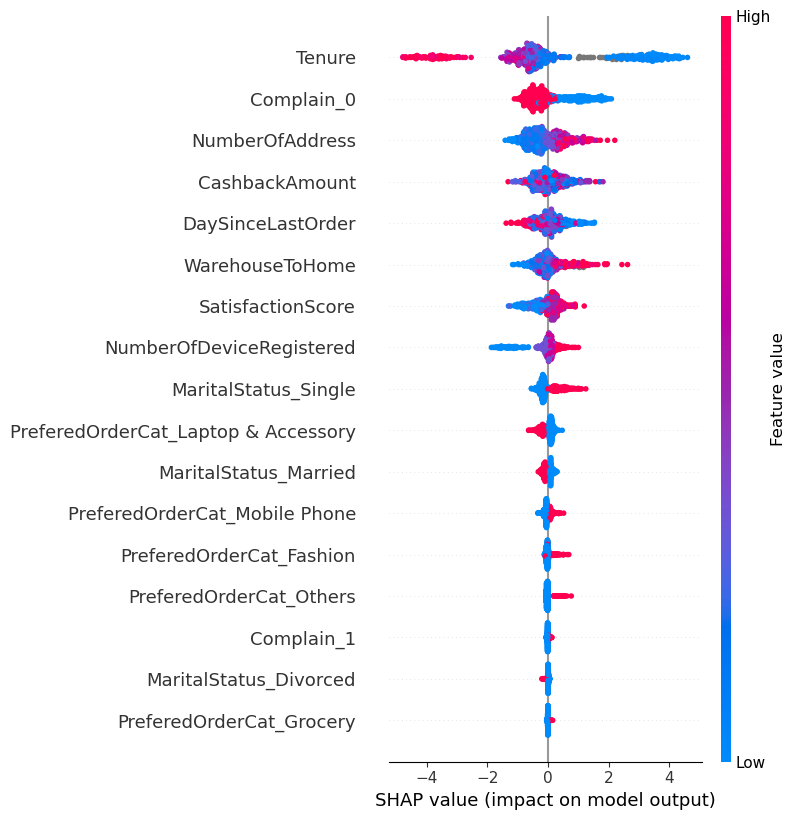

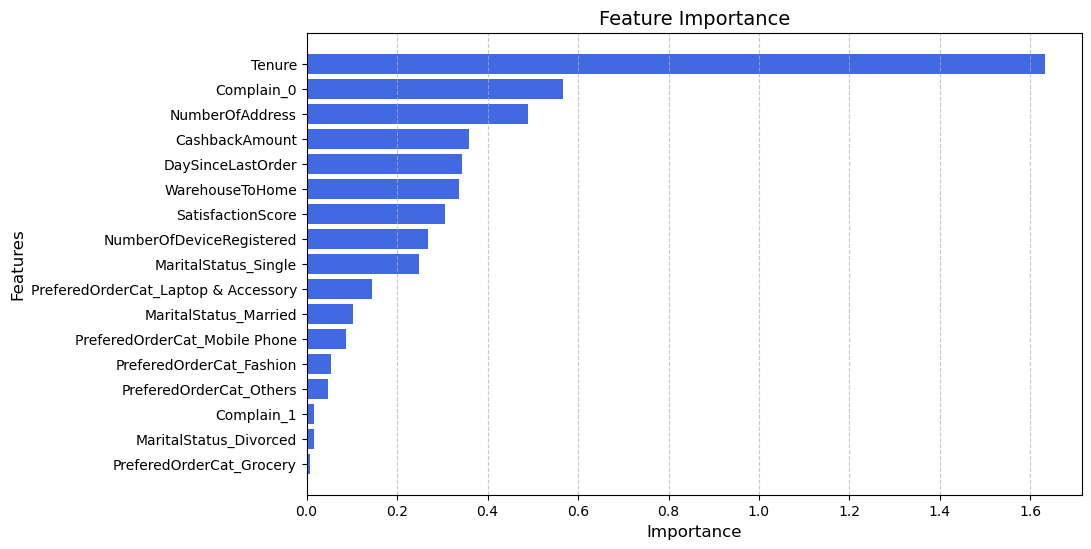

In [147]:
# 🔹 Transform X_train and X_test
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# 🔹 Get Transformed Feature Names
def get_feature_names(preprocessor, input_features):
    """Extracts feature names from preprocessor pipeline."""
    feature_names = []
    
    for name, transformer, columns in preprocessor.transformers_:
        if hasattr(transformer, "get_feature_names_out"):
            transformed_features = transformer.get_feature_names_out(columns)
            feature_names.extend(transformed_features)
        else:
            feature_names.extend(columns)
    
    return feature_names

feature_names = get_feature_names(preprocessor, X_train.columns)

# 🔹 Initialize SHAP Explainer
explainer = shap.Explainer(model, X_train_transformed)

# 🔹 Compute SHAP Values (Disable Additivity Check)
shap_values = explainer(X_test_transformed, check_additivity=False)

# 🔹 Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values, features=X_test_transformed, feature_names=feature_names)

# 🔹 Custom Bar Plot (Mean Absolute SHAP Values)
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Sort features by importance
sorted_indices = np.argsort(shap_importance)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importance = shap_importance[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[::-1], sorted_importance[::-1], color='royalblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [85]:
# Menghitung F2-score pada data test
f2_test = fbeta_score(y_test, y_pred, beta=2)

# Melakukan prediksi pada data train
y_train_pred = best_model.predict(X_train)

# Menghitung F2-score pada data train
f2_train = fbeta_score(y_train, y_train_pred, beta=2)

print("F2-score in data test:", f2_test)
print("F2-score in data train:", f2_train)

[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
F2-score in data test: 0.8114754098360656
F2-score in data train: 0.8572617561381606


> After Tuning F2-score : **0.8114754098360656**

In [88]:
#recall score

from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9252336448598131

> Recall score : **0.9252336448598131**

In [91]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('num_other', RobustScaler(),
                                                  ['NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'CashbackAmount']),
                                                 ('cat1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('sampler', RandomUnderSampler(random_state=42)),
                ('model',
                 LGBMClassifier(class_weight='balanced', colsample_bytree=0.7,
                                learning_rate=0.05, max_depth=10,
                                min_gain_to_split=0.05, n_estimators=300,
                                random_state=42, reg_alpha=1,
                                reg_lambda=0.5))])

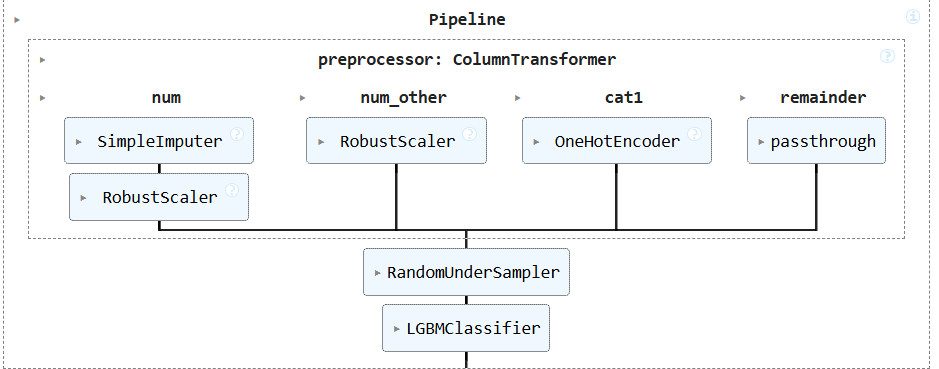

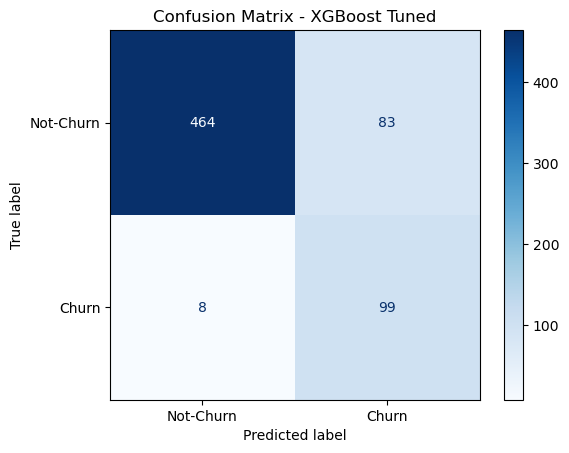

In [94]:
#Confusion Matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

#Plot confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['Not-Churn', 'Churn']).plot(cmap='Blues')
cm_display.ax_.set_title('Confusion Matrix - XGBoost Tuned')
plt.show()

In [96]:
#Extract TN, FP, FN, TP from confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(464, 83, 8, 99)

**Save Model**

In [99]:
import pickle  

# Save the best tuned model
pickle.dump(best_model, open('finalmodel_lgbm.sav', 'wb'))

***
## 5. Summarization

### 5.1. Model Constraint

In [102]:
X_train.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
count,2492.000000,2509.000000,2616.000000,2616.000000,2616.000000,2616.000000,2471.000000,2616.000000
mean,10.359551,15.514946,3.689602,3.011086,4.230505,0.276376,4.586807,178.328631
std,8.716275,8.663170,1.004761,1.385348,2.597985,0.447291,3.738471,49.803770
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,146.150000
50%,9.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,164.295000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,199.120000
max,61.000000,127.000000,6.000000,5.000000,21.000000,1.000000,46.000000,324.990000


In [104]:
#Melihat unique values pada data train
pd.set_option('display.max_colwidth', None)

columns = ['PreferedOrderCat', 'MaritalStatus']
values = []
nunique_list = []
for i in columns:
    value = X_train[i].unique()
    nunique = X_train[i].nunique()
    nunique_list.append(nunique)
    values.append(value)

display(
    pd.DataFrame({
    "columns" : columns,
    "values" : values,
    "nunique": nunique_list
})
       )
pd.reset_option('display.max_colwidth')

,columns,values,nunique
0,PreferedOrderCat,"[Mobile Phone, Grocery, Fashion, Laptop & Accessory, Others]",5
1,MaritalStatus,"[Divorced, Married, Single]",3


The model can only perform well if the test data meets the following criteria:

| **Criteria**                 | **Value Range**           | **Allowed Values**                                     |
|------------------------------|--------------------------|-------------------------------------------------------|
| **Tenure**                   | 0 - 61                   | -                                                     |
| **WarehouseToHome**          | 5 - 127                  | -                                                     |
| **NumberOfDeviceRegistered** | 1 - 6                    | -                                                     |
| **SatisfactionScore**        | 1 - 5                    | -                                                     |
| **NumberOfAddress**          | 1 - 21                   | -                                                     |
| **Complain**                 | 0 - 1                    | -                                                     |
| **DaySinceLastOrder**        | 0 - 46                   | -                                                     |
| **CashbackAmount**           | 0 - 324.99               | -                                                     |
| **PreferedOrderCat**         | -                        | Mobile Phone, Grocery, Fashion, Laptop & Accessory, Others |
| **MaritalStatus**            | -                        | Divorced, Married, Single                            |

### 5.1. Cost Benefit Analogy

Our best model can identify potential churn customers with a confidence level of F2-score 81% with recall score of 92.5%

| Column | Without ML (Before) | With ML (After, F2 = 81%)
| --- | --- | --- |
| Scenario	 | No targeted retention efforts	 | ML predicts churn and applies retention strategies |
| Total Customers	 | 10,000		 |10,000| 
| Churn Rate	 | 30%		 | 11% | 
| Lost Customers	 | 3,000	 | 2,921 |
| Revenue Lost	 | 600,000 (Dollar)	 | 584,200 (Dollar)| 
| Retention Cost	 | 0 (Dollar)	 | 3,950 (Dollar)|
| Final Profit	 | 1,400,000 (Dollar)	 | 1,611,950 (Dollar) | 
| Net Profit Gain	 | 0 (Dollar)	 | **11,950** (Dollar) | 

### 5.2. Recommendation

**BUSINESS RECOMMENDATIONS BASED ON E-COMMERCE CHURN PREDICTION**

**1. RETAINING NEW CUSTOMERS (SHORT TENURE)**  
**Insight:** Customers with a short tenure are at higher risk of churn.  
**Recommendations:**  
- **Improve Onboarding** → Provide an engaging welcome journey with tutorials, product recommendations, and a first-purchase discount.  
- **First-Time Buyer Incentives** → Offer cashback, free shipping, or personalized product bundles to encourage repeat purchases.  
- **Personalized Follow-Ups** → Use email/SMS reminders to re-engage new customers within their first 30-60 days.  

---

**2. ENHANCING CUSTOMER SATISFACTION & COMPLAINT MANAGEMENT**  
**Insight:** Customers who have submitted complaints are more likely to churn.  
**Recommendations:**  
- **Proactive Customer Support** → Identify at-risk customers with past complaints and offer priority resolution.  
- **Fast Issue Resolution** → Implement a 24-48 hour maximum response time for complaints.  
- **Compensation & Retention Offers** → Provide discounts, refunds, or loyalty points for affected customers to rebuild trust.  

---

**3. OPTIMIZING LOGISTICS FOR CUSTOMERS FAR FROM WAREHOUSES**  
**Insight:** The greater the distance between customers and warehouses, the higher the churn risk.  
**Recommendations:**  
- **Expand Warehouse Coverage** → Consider regional fulfillment centers near high-churn areas.  
- **Partner with Local Couriers** → Offer faster, more affordable last-mile delivery services.  
- **Flexible Delivery Options** → Introduce scheduled deliveries, express shipping, and pickup point alternatives.  

---

**4. TARGETED RETENTION FOR SINGLE CUSTOMERS**  
**Insight:** Single customers have a higher likelihood of churning compared to married customers.  
**Recommendations:**  
- **Personalized Marketing** → Highlight convenience, lifestyle-focused deals, and exclusive single-customer offers.  
- **Subscription & Bundling Options** → Promote auto-replenishment services, monthly essentials, or curated self-care packages.  
- **Community & Referral Programs** → Encourage engagement through gamification, referral bonuses, or exclusive single-customer perks.  

---

**5. REVENUE OPTIMIZATION & LOYALTY PROGRAMS**  
**Insight:** Churn behavior is influenced by multiple factors, including satisfaction, tenure, and preferences.  
**Recommendations:**  
- **Loyalty Programs** → Reward repeat purchases with exclusive perks (cashback, early access, free shipping).  
- **Dynamic Pricing & Promotions** → Use customer data to personalize discounts based on churn risk.  
- **Targeted Ad Retargeting** → Deploy retention campaigns for at-risk customers with persona
ized product recommendations and offers.  


### 5.3. Conclusion

Using Machine Learning (ML) for churn prediction **significantly improves customer retention**, optimizes business resources, and maximizes profit. Our model achieved a **92.52% recall** and an **F2 score of 0.8115**, allowing the business to correctly identify and retain most at-risk customers.

🔹 **Key Takeaways:**
- ✅ ML helps detect churn early, preventing customer loss before it's too late.
- ✅ Targeted retention strategies improve engagement and reduce unnecessary retention costs.
- ✅ Enhancing customer experience and loyalty programs can further reduce churn rates.
- ✅ Continuous model improvement (better features, new algorithms, real-time deployment) ensures long-term success.

By implementing these **data-driven retention strategies**, businesses can enhance customer satisfaction, reduce churn rates, and ultimately drive long-term profitability. 🚀  
